In [1]:
import pandas as pd
from auditflow.visualization import  visualize_flow
from auditflow.core import trace

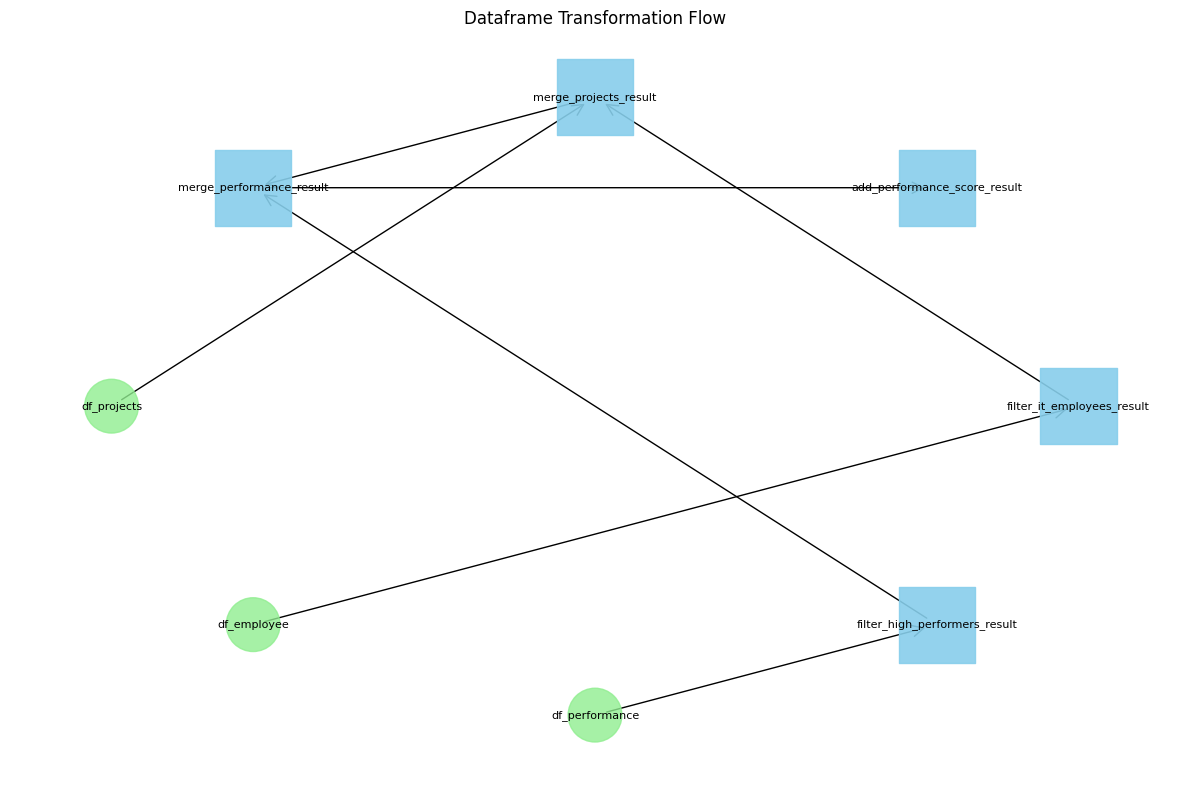

In [2]:

df_employee = pd.DataFrame({
    'emp_id': [1, 2, 3, 4, 5],
    'name': ['Alice', 'Bob', 'Charlie', 'David', 'Eve'],
    'department': ['IT', 'HR', 'IT', 'Finance', 'HR']
})
df_employee._auditflow_name = 'df_employee'

df_projects = pd.DataFrame({
    'project_id': [101, 102, 103],
    'project_name': ['Alpha', 'Beta', 'Gamma'],
    'emp_id': [1, 2, 1]
})
df_projects._auditflow_name = 'df_projects'

df_performance = pd.DataFrame({
    'emp_id': [1, 2, 3, 4, 5],
    'rating': [4.5, 3.8, 4.2, 3.9, 4.1]
})
df_performance._auditflow_name = 'df_performance'

@trace
def filter_it_employees(df):
    return df[df['department'] == 'IT']

@trace
def merge_projects(df_emp, df_proj):
    return df_proj.merge(df_emp, on='emp_id', how='inner')

@trace
def filter_high_performers(df):
    return df[df['rating'] > 4.0]

@trace
def merge_performance(df_emp_proj, df_perf):
    return df_emp_proj.merge(df_perf, on='emp_id', how='inner')

@trace
def add_performance_score(df):
    return df.assign(performance_score=df['rating'] * 10)

# Perform operations
it_employees = filter_it_employees(df_employee)
employee_projects = merge_projects(it_employees, df_projects)
high_performers = filter_high_performers(df_performance)
final_data = merge_performance(employee_projects, high_performers)
final_data_with_score = add_performance_score(final_data)
final_data_with_score._auditflow_name = 'final_data_with_score'

visualize_flow(final_data_with_score)

